In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.optimize import minimize

## 6.2, 6.3

In [2]:
f = np.array([10,20,30,40,50,60,70,80,90,100,110])
V = np.array([16,45,64,75,70, 115, 142, 167, 183,160, 221])
e = np.array([5,5,5,5,30,5,5,5,5,30,5])

In [5]:
w = 1/(e**2)

sum_w = w.sum()
sum_wx = (w*f).sum()
sum_wy = (w*V).sum()
sum_wxx = (w*f**2).sum()
sum_wxy = (w*f*V).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print('Pendiente:',m)
print('Error Pendiente:',m_std_err)
print('Intercepto:',b)
print('Error Intercepto:',b_std_err)




Pendiente: 2.0284648216102745
Error Pendiente: 0.05197830827721802
Intercepto: -0.9474964662767381
Error Intercepto: 3.386858673521736


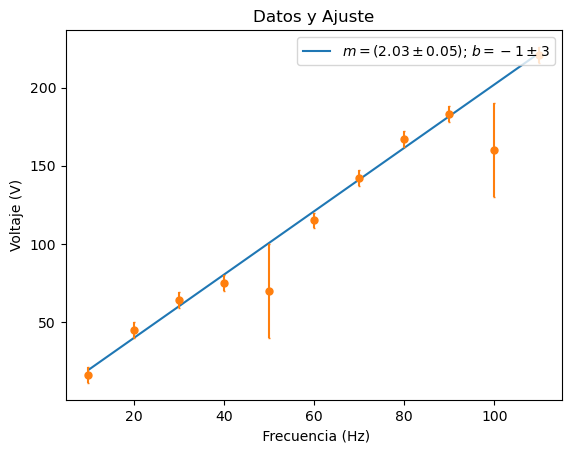

In [10]:
x = np.linspace(10, 110, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (2.03\pm 0.05)$" + "; " + r"$b = -1\pm 3$")
plt.errorbar(f, V, e, fmt="o", markersize=5, capsize=1)

plt.title("Datos y Ajuste")
plt.xlabel(" Frecuencia (Hz)")
plt.ylabel("Voltaje (V)")
plt.legend(loc="upper right")

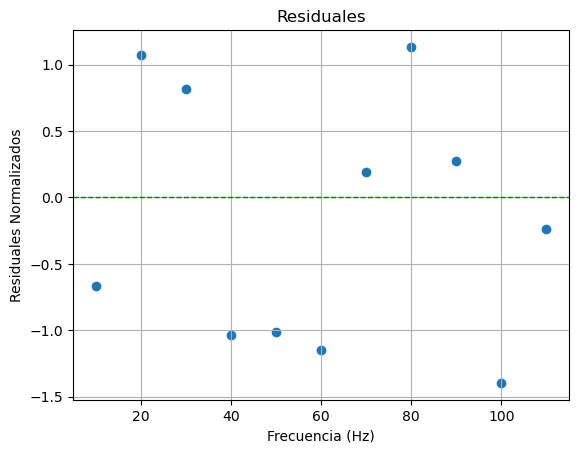

In [11]:

model = m*f+b
res = (V - model)/e

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(f, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_title('Residuales')
ax2.grid()


In [14]:
def DurbinWatson(R):
    return (np.sum((R[1:]-R[:-1])**2))/(np.sum(R**2))

DurbinWatson(res)

1.5517903818095427

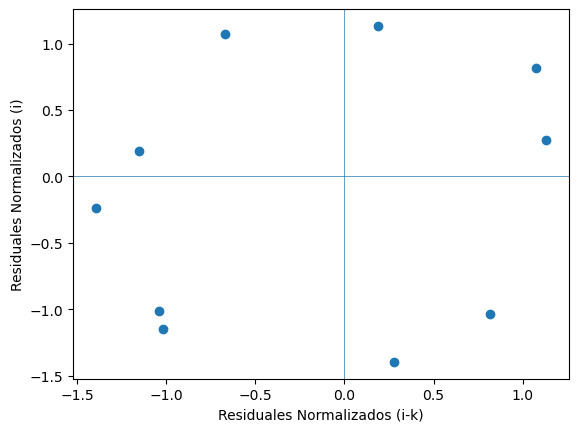

In [15]:
plt.scatter(res[:-1],res[1:])
plt.ylabel("Residuales Normalizados (i)")
plt.xlabel("Residuales Normalizados (i-k)")
plt.axhline(y = 0, linewidth=0.5)
plt.axvline(x=0, linewidth=0.5)

## 6.4

In [41]:
def chi(parametros):
    m,b=parametros
    return np.sum((V-(m*f+b))**2/(e**2))

In [42]:
estim=[1,1]
resp=minimize(chi,estim)

In [43]:
m_ideal,b_ideal=resp.x

print('Pendiente Ideal:',m_ideal)
print('Intercepto Ideal:',b)


Pendiente Ideal: 2.0284647943880425
Intercepto Ideal: -0.9474947332050837


## 6.5

In [44]:
D=np.array((0.05,0.25,0.45,0.65,0.85,1.05,1.25,1.45,1.65,1.85))
P=np.array((0.0,0.21,0.44,0.67,0.88,1.1,1.3,1.5,2.0,2.24))
Err=np.array((0.05,0.05,0.05,0.05,0.09,0.1,0.2,0.5,0.1,0.07))

In [45]:
w = 1/(Err**2)

sum_w = w.sum()
sum_wx = (w*D).sum()
sum_wy = (w*P).sum()
sum_wxx = (w*D**2).sum()
sum_wxy = (w*D*P).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print('Pendiente:',m)
print('Error Pendiente:',m_std_err)
print('Intercepto:',b)
print('Error Intercepto:',b_std_err)



Pendiente: 1.2397219665412587
Error Pendiente: 0.03925005362824148
Intercepto: -0.10700883885508011
Error Intercepto: 0.03266514103078884


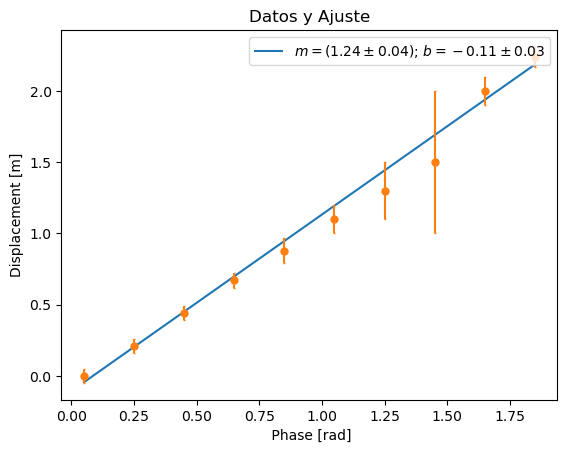

In [48]:
x = np.linspace(0.05, 1.85, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (1.24\pm 0.04)$" + "; " + r"$b = -0.11\pm 0.03$")
plt.errorbar(D, P, Err, fmt="o", markersize=5, capsize=1)

plt.title("Datos y Ajuste")
plt.xlabel(" Phase [rad]")
plt.ylabel("Displacement [m]")
plt.legend(loc="upper right")

In [50]:
speed=(2*np.pi*60e6)/m
print('La velocidad de la luz es de: ', speed)

La velocidad de la luz es de:  304093279.4653588


Se puede decir que se obtuvo un estimado cercano de la velocidad de la luz y que al tener un intercepto ideal de 0,

## 6.6

In [26]:
xs=np.array((1,2,3,4,5,6,7,8,9,10))
ys=np.array((51,103,150,199,251,303,347,398,452,512))
ey=np.array((1,1,2,2,3,3,4,5,6,7))

### i)

In [27]:
w = 1/(ey**2)

sum_w = w.sum()
sum_wx = (w*xs).sum()
sum_wy = (w*ys).sum()
sum_wxx = (w*xs**2).sum()
sum_wxy = (w*xs*ys).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print('Pendiente:',m)
print('Error Pendiente:',m_std_err)
print('Intercepto:',b)
print('Error Intercepto:',b_std_err)




Pendiente: 49.89790121339644
Error Pendiente: 0.31658015706387804
Intercepto: 1.7267713877515376
Error Intercepto: 0.9872895098081177


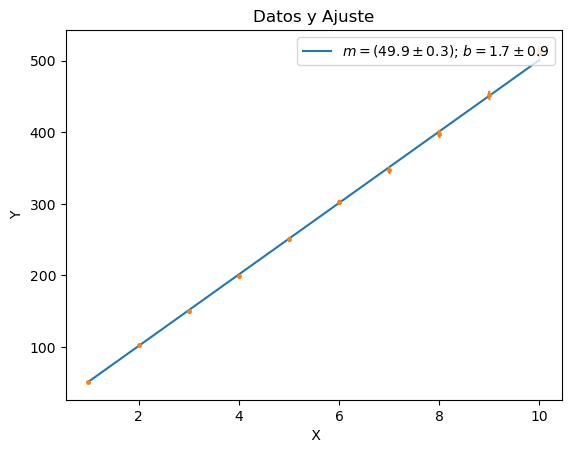

In [28]:
x = np.linspace(1, 10, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (49.9\pm 0.3)$" + "; " + r"$b = 1.7\pm 0.9$")
plt.errorbar(xs, ys, ey, fmt=".", markersize=5, capsize=1)

plt.title("Datos y Ajuste")
plt.xlabel(" X")
plt.ylabel("Y")
plt.legend(loc="upper right")

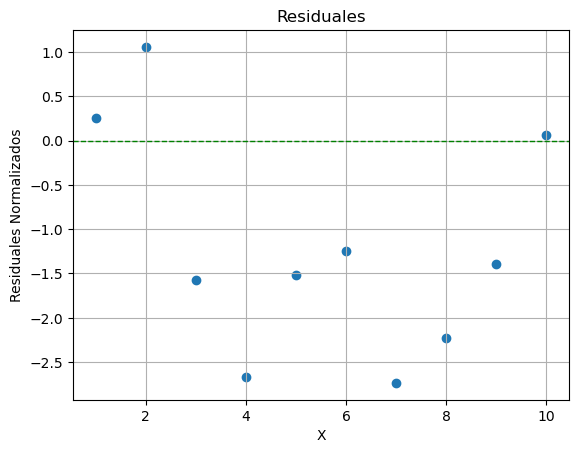

In [35]:

model = m*xs+b
res = (ys - model)/ey

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(xs, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('X')
ax2.set_title('Residuales')
ax2.grid()

### ii)

In [29]:
e_new=np.array((4,4,4,4,4,4,4,4,4,4))


In [30]:
w = 1/(e_new**2)

sum_w = w.sum()
sum_wx = (w*xs).sum()
sum_wy = (w*ys).sum()
sum_wxx = (w*xs**2).sum()
sum_wxy = (w*xs*ys).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print('Pendiente:',m)
print('Error Pendiente:',m_std_err)
print('Intercepto:',b)
print('Error Intercepto:',b_std_err)




Pendiente: 50.472727272727276
Error Pendiente: 0.4403855060505442
Intercepto: -1.0
Error Intercepto: 2.7325202042558927


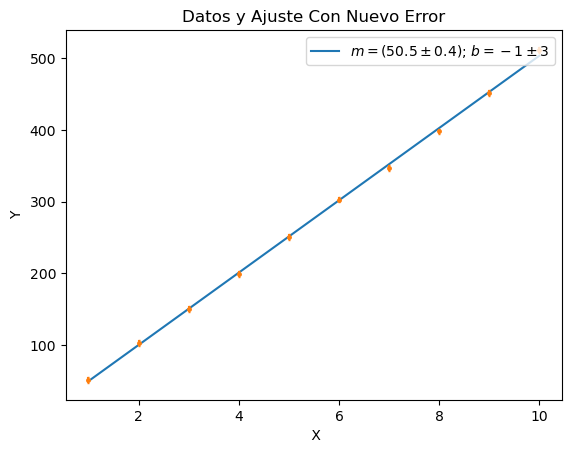

In [31]:
x = np.linspace(1, 10, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (50.5\pm 0.4)$" + "; " + r"$b = -1\pm 3$")
plt.errorbar(xs, ys, e_new, fmt=".", markersize=5, capsize=1)

plt.title("Datos y Ajuste Con Nuevo Error")
plt.xlabel(" X")
plt.ylabel("Y")
plt.legend(loc="upper right")

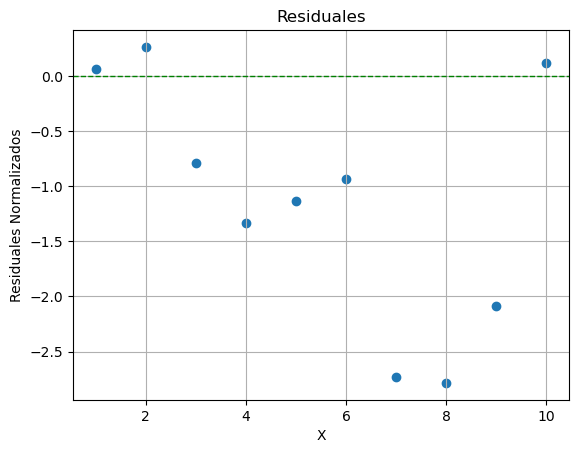

In [36]:

model = m*xs+b
res = (ys - model)/e_new

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(xs, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('X')
ax2.set_title('Residuales')
ax2.grid()

### iii)

In [32]:
e_new2 = np.array([1,8,8,8,8,8,8,8,8,1])

In [33]:
w = 1/(e_new2**2)

sum_w = w.sum()
sum_wx = (w*xs).sum()
sum_wy = (w*ys).sum()
sum_wxx = (w*xs**2).sum()
sum_wxy = (w*xs*ys).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print('Pendiente:',m)
print('Error Pendiente:',m_std_err)
print('Intercepto:',b)
print('Error Intercepto:',b_std_err)



Pendiente: 51.19874715261959
Error Pendiente: 0.155877022570768
Intercepto: -0.45340345705480367
Error Intercepto: 1.0979945499870805


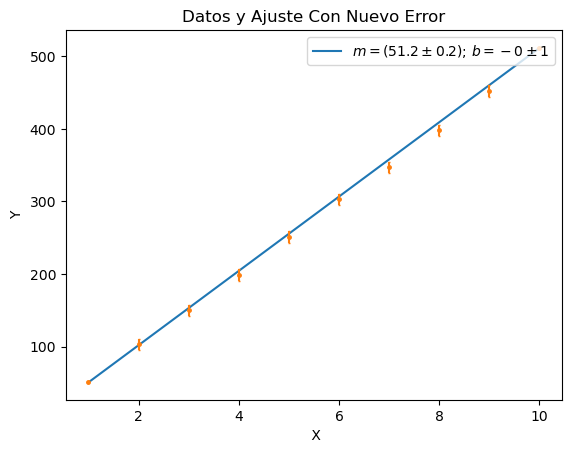

In [34]:
x = np.linspace(1, 10, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (51.2\pm 0.2)$" + "; " + r"$b = -0\pm 1$")
plt.errorbar(xs, ys, e_new2, fmt=".", markersize=5, capsize=1)

plt.title("Datos y Ajuste Con Nuevo Error")
plt.xlabel(" X")
plt.ylabel("Y")
plt.legend(loc="upper right")

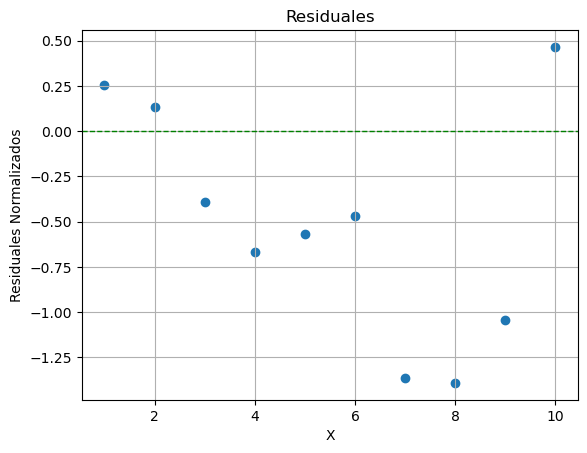

In [37]:

model = m*xs+b
res = (ys - model)/e_new2

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(xs, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('X')
ax2.set_title('Residuales')
ax2.grid()